<H1>Assignment 1 EDA</H1>

<h3> Submitted by Yash Agrawal  - yashagrawal300@gmail.com</h3>

<h3> Description of columns</h3>
<br><br>

<ol>
    
<li>age : age in years</li>
<li>sex : (1 = male; 0 = female)</li>
<li>cp : chest pain type</li>
<li>trestbps : resting blood pressure (in mm Hg on admission to the hospital)</li></li>
<li>chol : serum cholesterol in mg/dl</li>
<li>fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li>restecg : resting electrocardiographic results</li>
<li>thalach : maximum heart rate achieved</li>
<li>exang : exercise induced angina (1 = yes; 0 = no)</li>
<li>oldpeak : ST depression induced by exercise relative to rest</li>
<li>slope : the slope of the peak exercise ST segment</li>
<li>ca : number of major vessels (0-3) colored by fluoroscopy</li>
<li>thal : 3 = normal; 6 = fixed defect; 7 = reversible defect</li>
<li>target : 1 or 0</li>
</ol>


<h3>Questions to be solved:</h3>
<br><br>

1. How many are suffering from heart disease? Also plot the stats.<br>
2. How many males and females have heart disease out of total?<br>
3. Visualize frequency distribution of the thalach variable and find what's the heart rate and heart disease relation?<br>
4. Find correlation matrix for all the variables with target.<br>
5. Find Mean,Min & Max of age and plot its distribution.<br>
6. Age and its relation to heart disease. Are young people more prone to heart disease?<br>
7. Plot chest pain type pie chart.<br>
8. What is the max heart rate achieved in non heart disease patients?<br>

In [101]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Reading the Data

df = pd.read_csv("Heart.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
#Checking Null values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<h3>Q1 How many are suffering from heart disease? Also plot the stats.</h3>

In [18]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

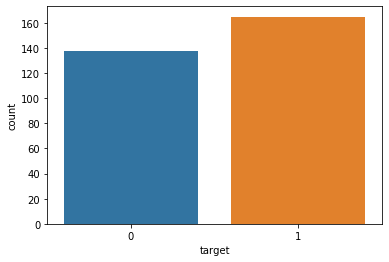

In [20]:
sns.countplot(df.target)
plt.show()

165 People are suffering from Heart disease

<h3>Q2 How many males and females have heart disease out of total?</h3>

In [40]:
df.groupby(["target", "sex"])["sex"].count()

target  sex
0       0       24
        1      114
1       0       72
        1       93
Name: sex, dtype: int64

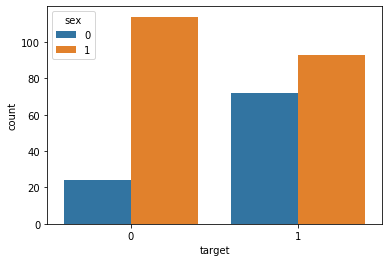

In [26]:
sns.countplot(df.target, hue=df.sex)

72 females and 93 males have heart disease in total

<h3>Q3.Visualize frequency distribution of the thalach variable and find what's the heart rate and heart disease relation?</h3>

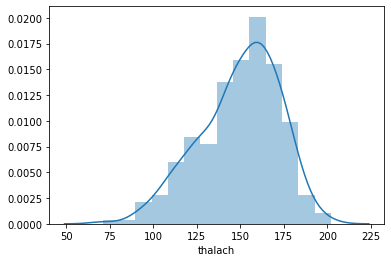

In [50]:
sns.distplot(df.thalach)

In [61]:
df['target'].corr(df['thalach'])

0.42174093381067473

Heart rate has some relation(not so strong) with heart disease

### Q4 Find correlation matrix for all the variables with target

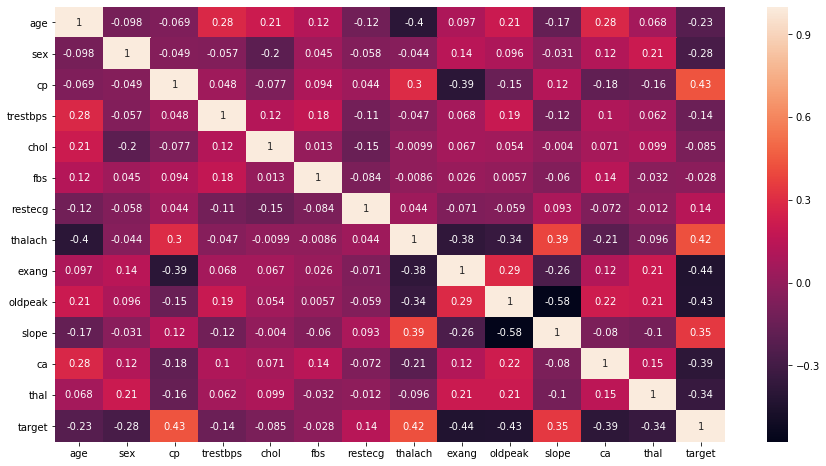

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True)
plt.show()

### Q5 Find Mean,Min & Max of age and plot its distribution.

In [62]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

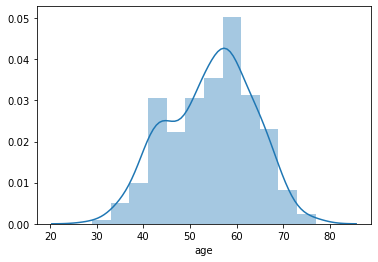

In [65]:
sns.distplot(df.age)
plt.show()

Mean of age is 54.366 , minimun age is 29, maximum age is 77

### Q6 Age and its relation to heart disease. Are young people more prone to heart disease?

In [81]:
df['target'].corr(df['age'])

-0.22543871587483727

The correlation between age and heart disease is very less So it is not necessary that young people are more prone to heart disease

### Q6 Plot chest pain type pie chart.

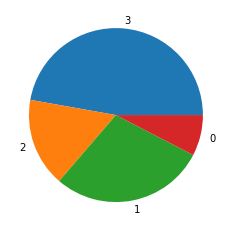

In [76]:

plt.pie(df.groupby(["cp"])["cp"].count(), labels = df["cp"].unique()
)
plt.show()

### Q8 What is the max heart rate achieved in non heart disease patients?

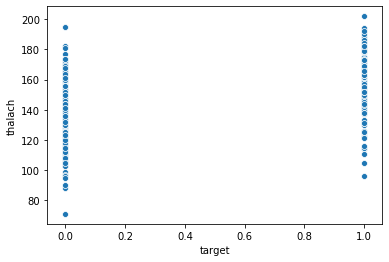

In [82]:
sns.scatterplot(df.target, df.thalach)

In [100]:
df.thalach[df['target']==0 & df["thalach"]].max()

195

The max heart rate achived by the non heart disease patients is 195